In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import IFrame

def embed_lecture_slides(path, width="100%", height="600"):
    lecture_host = "https://www.uni-muenster.de/AISystems/courses/drl/nn/"
    # lecture_host = "http://localhost:8889/OnlineWebsite/"
    return IFrame(f"{lecture_host}{path}", width=width, height=height)

# Regression with Linear Model

In [2]:
embed_lecture_slides("02_Regression/02-regression-deck.html#/title-slide")

## Data

In [3]:
data = [
    {"size": 50, "price": 450, "rooms": 2, "distance_to_center": 5, "district": "Gievenbeck"},
    {"size": 25, "price": 500, "rooms": 1, "distance_to_center": 3.5, "district": "Sentrup"},
    {"size": 35, "price": 770, "rooms": 1, "distance_to_center": 3, "district": "Wienburg"},
    {"size": 80, "price": 800, "rooms": 3, "distance_to_center": 8, "district": "Nienberge"},
    {"size": 62, "price": 800, "rooms": 2, "distance_to_center": 5, "district": "Coerde"},
    {"size": 70, "price": 820, "rooms": 3, "distance_to_center": 4.5, "district": "Gievenbeck"},
    {"size": 19, "price": 440, "rooms": 1, "distance_to_center": 7, "district": "Nienberge"},
    {"size": 73, "price": 1127, "rooms": 3.5, "distance_to_center": 5, "district": "Wienburg"},
    {"size": 20, "price": 769, "rooms": 1, "distance_to_center": 1, "district": "Zentrum"},
]

# Extract regressors and regressands
sizes = np.array([apt['size'] for apt in data], dtype=float)
distances = np.array([apt['distance_to_center'] for apt in data], dtype=float)
prices = np.array([apt['price'] for apt in data], dtype=float)
rooms = np.array([apt['rooms'] for apt in data], dtype=float)


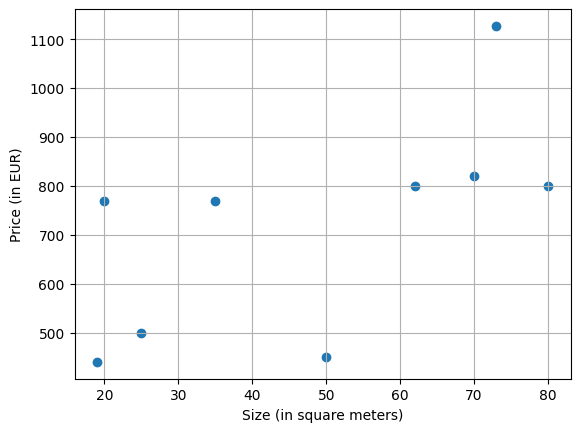

In [4]:
# Visualize apartment price vs size
%matplotlib inline

plt.close()
plt.scatter(x=sizes, y=prices)
plt.xlabel('Size (in square meters)')
plt.ylabel('Price (in EUR)')
plt.grid(True)
plt.show()

## Notation

In [5]:
embed_lecture_slides("02_Regression/02-regression-deck.html#/basic-notation-2")

In [6]:
X = np.column_stack((sizes, rooms))
print(f"{X.shape[0]} samples x {X.shape[1]} features:")
print(X)

9 samples x 2 features:
[[50.   2. ]
 [25.   1. ]
 [35.   1. ]
 [80.   3. ]
 [62.   2. ]
 [70.   3. ]
 [19.   1. ]
 [73.   3.5]
 [20.   1. ]]


### Numpy and linear algebra

In [7]:
x = np.ones(3)
print(f"{np.linalg.norm(x) ** 2:.1f}")  # squared norm of x
print(x.T @ x)  # we expect the squared norm of x
print(x @ x.T)  # we expect a 3x3 matrix
print(x)  # we expect a column vector
print(x.T)  # we expect a row vector

3.0
3.0
3.0
[1. 1. 1.]
[1. 1. 1.]


Why are we surprised?

- In math, 1D vectors default to column orientation
- Frame it like this: In math, 1D vector $x\in\mathbb{R}^m$ is implicitly treated as 2D vector $x\in\mathbb{R}^{m\times 1}$

- Numpy is general-purpose, not linear algebra
- 1D numpy arrays are orientation-less (neither row nor column vector)
- Many operations work as expected, though
- Still, we sometimes need to explicitly implement the mathematical convention

**Task: Explicit column vector in numpy**

- Convert $x$ to a 2D numpy array that explicitly implements a column vector

In [8]:
z = np.ones(3)
x = z.reshape(3, 1)  # make x a column vector
x


array([[1.],
       [1.],
       [1.]])

**Task: Verification**

In [9]:
try:
    assert x.T @ x == 3
    assert (x @ x.T).shape == (3, 3)
    print(x)
except:
    print("Task not successful")

[[1.]
 [1.]
 [1.]]


## Mean Squared Error

In [10]:
embed_lecture_slides("02_Regression/02-regression-deck.html#/error-functions")

Matrix notation:
$$
\begin{aligned}
E(w) &= \frac{1}{m}\sum^m_{i=1}(y^{(i)}-f(x^{(i)},w))^2\\
&= \frac{1}{m}\lVert y-f(X,w)\rVert_2^2
\end{aligned}
$$

Note:
- as an optimization problem, we might omit the $\frac{1}{m}$ factor

Question:
- Why do we take the square?

In [11]:
def mean_squared_error(y_true, y_pred, verbose=True):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2

    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    if verbose:
        print(f"MSE: {mse: ,.1f}")

    return mse

## Linear Function Approximator

### Notation
For inputs $x^{(i)}\in\mathbb{R}^{d}$, linear regression optimizes parameters $b\in\mathbb{R}, w\in\mathbb{R}^{d}$ of a linear model
$$
f(x^{(i)}, \{w, b\}) := \langle x^{(i)}, w \rangle + b
$$

or, in matrix notation
$$
f(X, \{w, b\}) := Xw + b\cdot 1
$$
where $1\in\mathbb{R}^{m}$, $X\in\mathbb{R}^{m\times d}$

### Intercept Convention
By including the bias $b$ (aka intercept) as additional feature in the input
$$
X=[1 \mid X]\in \mathbb{R}^{m\times d+1}
$$

we simply define the linear model as
$$
f(X, w) := Xw
$$
where now $w\in\mathbb{R}^{d+1}$

### Optimization Target
Substituting $f$ in the optimization target (and omitting a scalar) we obtain
$$
\underset{w}{\mathrm{arg\,min}}\; \lVert Xw - y\rVert^2_2 \tag{1}
$$

Note (multivariate case):
- for general multivariate linear regression, we just adapt $w, y$ to uppercase

Experiment with fitting $w_0$ aka *intercept* and $w_1$ aka *slope* to model apartment price as a linear function of apartment size:

interactive(children=(FloatSlider(value=1.0, description='slope', max=50.0, min=-10.0), FloatSlider(value=0.0,…

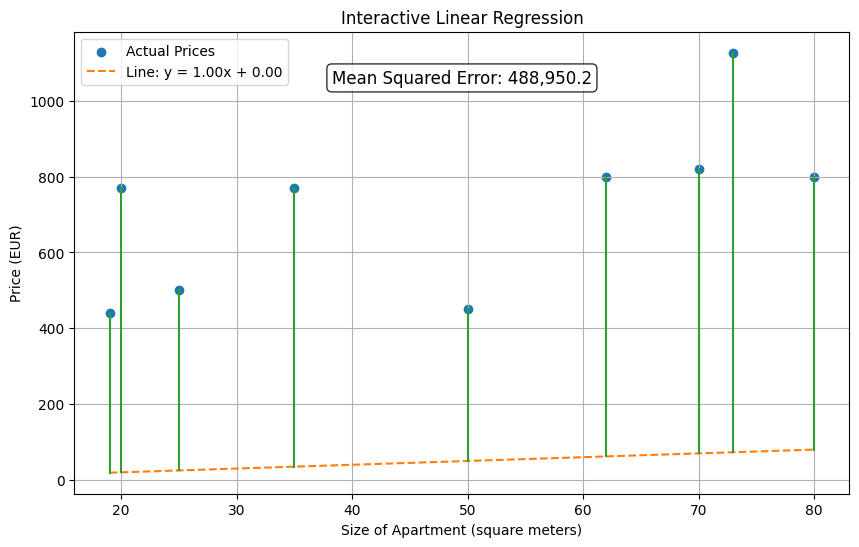

In [12]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Function to plot with adjustable slope and intercept
def update_plot(ax, polynomial, quadratic=0, slope=1, intercept=0):
    title = "Interactive Linear Regression"
    legend = lambda _, b, c: f"Line: y = {b:.2f}x + {c:.2f}"
    if polynomial:  # used further below
        title = "Interactive Polynomial Regression"
        legend = lambda a, b, c: f"Line: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}"

    # Clear the axes but keep the figure
    ax.clear()
    
    # Scatter plot of the actual data
    ax.scatter(sizes, prices, color="C0", label='Actual Prices')
    
    # Line equation: y = slope * x + intercept
    predicted_prices = quadratic * sizes ** 2 + slope * sizes + intercept
    
    # Plot the fitted line with the current quadratic, slope and intercept
    sizes_grid = np.linspace(sizes.min(), sizes.max(), 50)
    predicted_prices_grid = quadratic * sizes_grid ** 2 + slope * sizes_grid + intercept
    ax.plot(sizes_grid, predicted_prices_grid, color="C1", label=legend(quadratic, slope, intercept), linestyle='--')

    # Draw error bars: vertical lines between actual and predicted values - more efficient approach
    error_lines = []
    for i in range(len(sizes)):
        error_lines.extend([[sizes[i], sizes[i]], [prices[i], predicted_prices[i]], [None, None]])
    
    # Plot all error lines at once (more efficient than individual plots)
    x_coords = [error_lines[i] for i in range(0, len(error_lines), 3)]
    y_coords = [error_lines[i] for i in range(1, len(error_lines), 3)]
    
    for x_line, y_line in zip(x_coords, y_coords):
        ax.plot(x_line, y_line, color="C2", linestyle='-', lw=1.5)

    # Calculate and display the mean squared error (MSE)
    mse = mean_squared_error(prices, predicted_prices, verbose=False)
    ax.text(0.5, 0.9, f'Mean Squared Error: {mse:,.1f}', 
            horizontalalignment='center', verticalalignment='center', 
            transform=ax.transAxes, fontsize=12, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Labels, title, and legend
    ax.set_title(title)
    ax.set_xlabel('Size of Apartment (square meters)')
    ax.set_ylabel('Price (EUR)')
    ax.legend()
    ax.grid(True)
    
    # Redraw the canvas
    fig.canvas.draw_idle()

#%matplotlib ipympl
plt.close()

# Create persistent figure and axes for better performance
fig, ax = plt.subplots(figsize=(10, 6))

# Interactive widgets for slope and intercept
interact(update_plot, ax=fixed(ax), quadratic=fixed(0), polynomial=fixed(False),
         slope=widgets.FloatSlider(min=-10, max=50, step=0.1, value=1), 
         intercept=widgets.FloatSlider(min=-1000, max=3000, step=50, value=0));


**Task: Model API**
- In order to familiarize yourself with a typical model API, we implement a simple model
- The simple model fits a straight line using only two data points
- Complete the code in the `fit` and `predict` methods

**Explanation:**
1. `fit`: This method is supposed to train the model. Here, it calculates slope and intercept based on the first two data points.
2. `predict`: This method is expected to provide predictions on new inputs based on its learned parameters.

In [28]:
X[1,0]

np.float64(25.0)

In [29]:
class NaiveLinearModel:
    """
    Naive model fits a straight line through the first two data points (x^(1), y^(1)) and (x^(2), y^(2))
    """

    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        """
        Calculate perfect slope and intercept for straight line through (x^(1), y^(1)) and (x^(2), y^(2)).
        We assume simple regression i.e. 1 feature dimension. 

        Parameters:
        X : numpy array, shape (n_samples, 1)
            The independent variable (e.g. apartment size) as explicit column vector(!)
        y : numpy array, shape (n_samples)
            The dependent variable (e.g. apartment price)
        """
        pass
        x1, y1 = X[0,0], y[0]
        x2, y2 =  X[1,0], y[1]

        if x2 == x1:
            self.slope = 0
        else:
            self.slope =  (y2 - y1) / (x2 - x1)

        self.intercept = y1 - self.slope * x1

    def predict(self, X):
        """
        Get model predictions on new data X.
        Assumed to be called after `fit`.

        Parameters:
        X : numpy array, shape (n_samples, 1)
            The independent variable (e.g. apartment size) as explicit column vector(!)

        Returns:
        predictions : numpy array, shape (n_samples,)
        """
        return self.slope * X[:, 0] + self.intercept
    
    @staticmethod
    def plot(X, y, predictions):
        sorted_indices = np.argsort(X[:, 0])
        plt.plot(X[sorted_indices], predictions[sorted_indices], color='red', label='Predicted Values')
        plt.scatter(X, y, color='blue', label='Actual Values')
        for x_val, y_true, y_hat in zip(X[:,0], y, predictions):
            plt.plot([x_val, x_val], [y_true, y_hat], color='red', linestyle='--', linewidth=0.8)
        plt.xlabel('Apartment size')
        plt.ylabel('Apartment price')
        plt.title("Simple linear regression")
        plt.legend()
        plt.show()

**Task: Verification**

MSE:  128,352.2


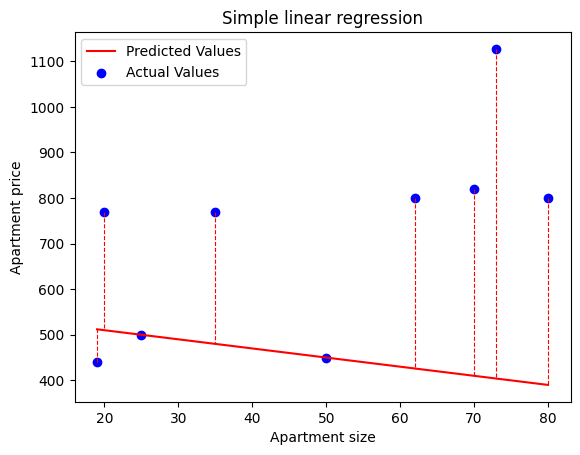

In [30]:
X = sizes.reshape(-1, 1)  # explicit column vector
y = prices

try:
    model = NaiveLinearModel()
    model.fit(X, y)
    assert model.slope is not None and model.intercept is not None, "Model not fitted properly."
    predictions = model.predict(X)
    mean_squared_error(predictions, y)
    
    %matplotlib inline
    plt.close()
    model.plot(X=X, y=prices, predictions=predictions)

except:
    print("Task not successful")

## Analytic Solution
The normal equation gives us an analytic solution to the minimization problem $\underset{w}{\mathrm{arg\,min}}\; \lVert Xw - y\rVert^2_2$\
where $X\in\mathbb{R}^{m\times d}, w\in\mathbb{R}^d, y\in\mathbb{R}^m$:
$$
w = X^+ y
$$
with Moore-Penrose Pseudoinverse $X^+$. It holds 
$$
X^+ = (X^\intercal X)^{-1}X^\intercal
$$
if $X^\intercal X$ is invertible.

In [31]:
embed_lecture_slides("02_Regression/02-regression-deck.html#/minimize-mse-1/4")

### Visualizing the normal equation

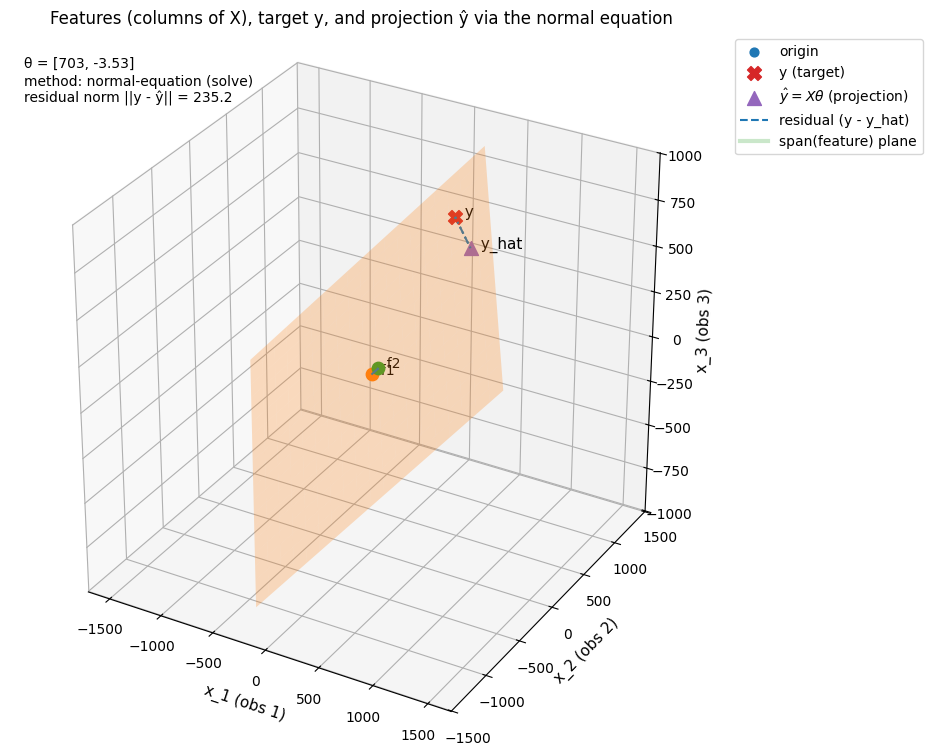

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection
from numpy.linalg import svd, matrix_rank, LinAlgError

def plot_normal_equation(X, y, show_span=True, annotate=True):
    """
    Visualize features and the normal-equation solution in R^3.
    
    Parameters
    ----------
    X : array-like, shape (3, p)
        Feature matrix whose COLUMNS are the feature vectors (in R^3).
    y : array-like, shape (3,)
        Target vector (3 observations).
    show_span : bool
        If True, draw the 1D/2D span (line/plane) of the feature columns when rank < 3.
    annotate : bool
        If True, annotate feature points and theta values on the plot.
    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(3,)
    
    if X.shape[0] != 3:
        raise ValueError("X must have 3 rows (3 observations). Got shape %s" % (X.shape,))
    if y.shape[0] != 3:
        raise ValueError("y must be length 3 (one entry per observation).")
    
    n_obs, p = X.shape
    # Solve normal equation. Try direct solve first (if invertible), otherwise use pseudoinverse.
    try:
        XtX = X.T @ X
        Xt_y = X.T @ y
        theta = np.linalg.solve(XtX, Xt_y)  # (X^T X)^{-1} X^T y
        method = "normal-equation (solve)"
    except LinAlgError:
        theta = np.linalg.pinv(X) @ y
        method = "pseudoinverse (pinv) fallback"
    
    y_hat = X @ theta
    resid = y - y_hat
    resid_norm = np.linalg.norm(resid)
    
    # Prepare 3D figure
    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1,1,1))
    
    # Plot origin
    origin = np.zeros(3)
    ax.scatter(*origin, marker='o', s=40, label='origin')
    
    # Plot feature vectors (columns of X) as arrows from origin and points
    for j in range(p):
        v = X[:, j]
        ax.quiver(0,0,0, v[0], v[1], v[2], length=1.0, arrow_length_ratio=0.08, linewidth=1.5)
        ax.scatter(*v, s=80, marker='o')
        if annotate:
            ax.text(v[0], v[1], v[2], f'  f{j+1}', fontsize=10)
    
    # Plot y and y_hat
    ax.scatter(*y, s=100, marker='X', label='y (target)')
    ax.text(y[0], y[1], y[2], '  y', fontsize=11)
    ax.scatter(*y_hat, s=100, marker='^', label=r'$\hat y = X\theta$ (projection)')
    ax.text(y_hat[0], y_hat[1], y_hat[2], '  y_hat', fontsize=11)
    
    # Draw line from y to y_hat (error vector)
    ax.plot([y[0], y_hat[0]], [y[1], y_hat[1]], [y[2], y_hat[2]],
            linestyle='--', linewidth=1.5, label='residual (y - y_hat)')
    # Also plot residual as an arrow from y_hat to y
    ax.quiver(y_hat[0], y_hat[1], y_hat[2], resid[0], resid[1], resid[2],
              length=1.0, arrow_length_ratio=0.1, linestyle='dotted')
    
    # Optionally plot the span (line or plane) spanned by the feature columns
    if show_span:
        # Use SVD to get orthonormal basis for column space (left singular vectors)
        U, S, Vt = svd(X, full_matrices=True)
        r = matrix_rank(X)
        if r == 1:
            u1 = U[:, 0]
            # plot a line along u1 spanning roughly the magnitude of features and y
            mags = np.hstack([np.linalg.norm(X, axis=0), np.linalg.norm(y)])
            tmax = mags.max() * 1.2 if mags.size else 1.0
            t = np.linspace(-tmax, tmax, 50)
            line_pts = np.outer(u1, t)
            ax.plot(line_pts[0, :], line_pts[1, :], line_pts[2, :], alpha=0.25, linewidth=3, label='span(feature) line')
        elif r == 2:
            # plane spanned by U[:,0] and U[:,1]
            u1 = U[:, 0]
            u2 = U[:, 1]
            # choose coefficient ranges based on existing vectors' coordinates in the basis
            # project existing vectors onto the plane to determine scale
            coords = np.linalg.lstsq(np.column_stack([u1, u2]), np.column_stack([X, y]), rcond=None)[0]
            max_val = np.abs(coords).max() if coords.size else 1.0
            a = np.linspace(-max_val*1.2, max_val*1.2, 20)
            b = np.linspace(-max_val*1.2, max_val*1.2, 20)
            A, B = np.meshgrid(a, b)
            plane_pts = (u1[:, None, None] * A[None, :, :]) + (u2[:, None, None] * B[None, :, :])
            ax.plot_surface(plane_pts[0], plane_pts[1], plane_pts[2], alpha=0.25, rstride=1, cstride=1, shade=False)
            ax.plot([], [], [], alpha=0.25, linewidth=3, label='span(feature) plane')  # dummy for legend
        else:
            # rank 3: span is full R^3, no need to draw
            pass
    
    # Axis labels: each axis corresponds to that observation index
    ax.set_xlabel('x_1 (obs 1)', fontsize=11)
    ax.set_ylabel('x_2 (obs 2)', fontsize=11)
    ax.set_zlabel('x_3 (obs 3)', fontsize=11)
    
    # Annotate theta and fit stats
    theta_text = "θ = [" + ", ".join(f"{t:.3g}" for t in theta) + "]"
    stats_text = f"method: {method}\nresidual norm ||y - ŷ|| = {resid_norm:.4g}"
    ax.text2D(0.02, 0.95, theta_text, transform=ax.transAxes, fontsize=10)
    ax.text2D(0.02, 0.90, stats_text, transform=ax.transAxes, fontsize=10)
    
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
    ax.set_title("Features (columns of X), target y, and projection ŷ via the normal equation")
    plt.tight_layout()
    plt.show()

X = np.column_stack((np.ones(len(sizes)), sizes))[:3]
y = prices[:3]

# Example 2: single feature -> line visible
# X = np.array([[1.0], [2.0], [3.0]])
# y = np.array([0.5, 1.0, 1.2])

%matplotlib widget
plt.close()
plot_normal_equation(X, y, show_span=True)


### Implementing the normal equation

In [36]:
embed_lecture_slides("02_Regression/02-regression-deck.html#/exercise-tasks-week-2---linear-regression")

In [37]:
class AnalyticLinearModel:
    """
    A linear regression model that directly calculates the optimal weights
    using the normal equation (closed-form solution) for multiple input dimensions.
    This model does not provide an intercept term by itself, but instead expects
    the input X to include a bias column as first column (all 1s).
    """

    def __init__(self):
        self.weights = None  # Weights vector (including bias weight)

    def fit(self, X, y):
        """
        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        """
        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array, shape (n_samples,)
        """
        return X @ self.weights
    
    def fit_and_plot(self, X, y, title="Linear Regression"):
        """
        Convenience method to both fit and plot.

        Parameters:
        X : numpy array, shape (n_samples, n_features).
            n_features is assumed to be 1, 2 or 3.
            If n_features > 1, bias is assumed to be included as first column.
            Bias axis is omitted in plot.
        """
        self.fit(X, y)
        predictions = self.predict(X)
        mean_squared_error(predictions, y)
        if X.shape[1] > 1:
            # assume first column is bias term (all 1s) which we do not plot as a proper feature
            X = X[:, 1:]
        assert X.shape[1] in [1, 2], "Can only plot 1D or 2D data (excluding intercept)"
        if X.shape[1] == 1:
            self.plot_1d(X, y, predictions, title=title)
        elif X.shape[1] == 2:
            x1_grid = np.linspace(X[:,0].min(), X[:,0].max(), 50)
            x2_grid = np.linspace(X[:,1].min(), X[:,1].max(), 50)
            x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)
            X_grid = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
            if self.weights.shape[0] > X.shape[1]:  # fitted with intercept
                X_grid = np.column_stack((np.ones(X_grid.shape[0]), X_grid))
            predictions_mesh = self.predict(X_grid).reshape(x1_mesh.shape)
            self.plot_2d(X, y, predictions, x1_mesh, x2_mesh, predictions_mesh, title=title)
    
    @staticmethod
    def plot_1d(X, y, predictions, title, x1_mesh=None, predictions_mesh=None):
        if x1_mesh is None or predictions_mesh is None:
            x1_mesh = X
            predictions_mesh = predictions
        sorted_indices = np.argsort(x1_mesh[:, 0])
        plt.plot(x1_mesh[sorted_indices], predictions_mesh[sorted_indices], color='red', label='Predicted Values')
        plt.scatter(X, y, color='blue', label='Actual Values')
        for x_val, y_true, y_hat in zip(X[:,0], y, predictions):
            plt.plot([x_val, x_val], [y_true, y_hat], color='red', linestyle='--', linewidth=0.8)
        plt.xlabel('X values')
        plt.ylabel('y values')
        plt.title(title)
        plt.legend()
        plt.show()

    @staticmethod
    def plot_2d(X, y, predictions, x1_mesh, x2_mesh, predictions_mesh, title):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x1_mesh, x2_mesh, predictions_mesh, color='red', alpha=0.5)
        ax.scatter(X[:,0], X[:,1], y, color='blue')
        ax.scatter(X[:,0], X[:,1], predictions, color='orange')
        for x_val1, x_val2, y_true, y_hat in zip(X[:,0], X[:,1], y, predictions):
            ax.plot([x_val1, x_val1], [x_val2, x_val2], [y_true, y_hat], color='red', linestyle='--', linewidth=0.8)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Target')
        plt.title(title)
        plt.show()

MSE:  62,446.1


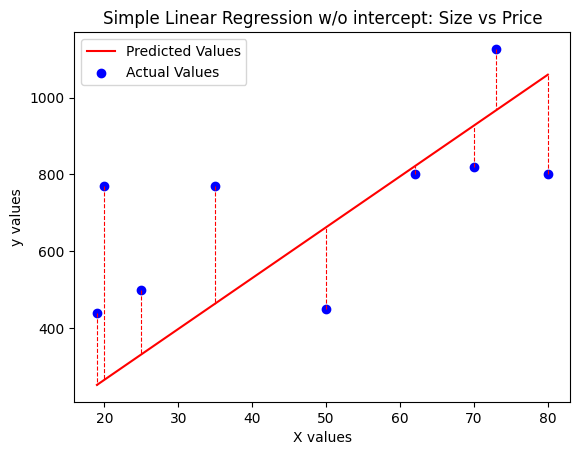

In [38]:
# Simple Regression w/o intercept
%matplotlib inline
plt.close()
X = np.column_stack((sizes, ))
AnalyticLinearModel().fit_and_plot(X, y=prices, title="Simple Linear Regression w/o intercept: Size vs Price")

MSE:  26,691.2


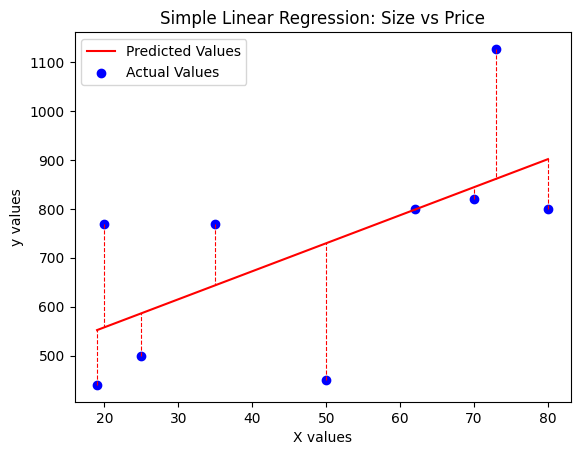

In [43]:
# Simple Regression
%matplotlib inline
plt.close()
X = np.column_stack((np.ones(sizes.shape[0]), sizes))
AnalyticLinearModel().fit_and_plot(X, y=prices, title="Simple Linear Regression: Size vs Price")

MSE:  17,238.9


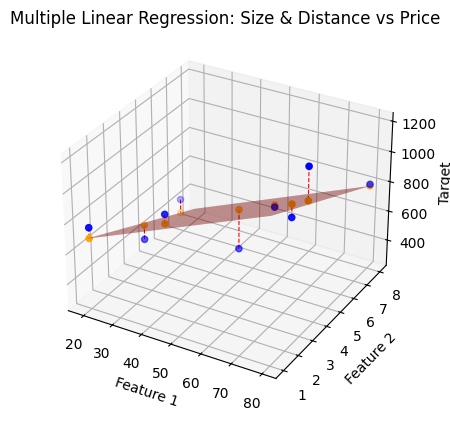

In [55]:
# Multiple Regression


#%matplotlib ipympl
plt.close()
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))
AnalyticLinearModel().fit_and_plot(X, y=prices, title="Multiple Linear Regression: Size & Distance vs Price")

### 3rd Party Implementation - sklearn

**Task: Linear Regression with sklearn**
- Complete the code
- Use an sklearn model predict `prices` from `sizes` via linear regression with intercept

In [59]:
from sklearn.linear_model import LinearRegression

X =  np.column_stack((np.ones(sizes.shape[0]), sizes))
sklearn_model = LinearRegression(fit_intercept=True).fit(X, prices)
sklearn_predictions = sklearn_model.predict(X)

**Task: Verification**

MSE:  26,691.2


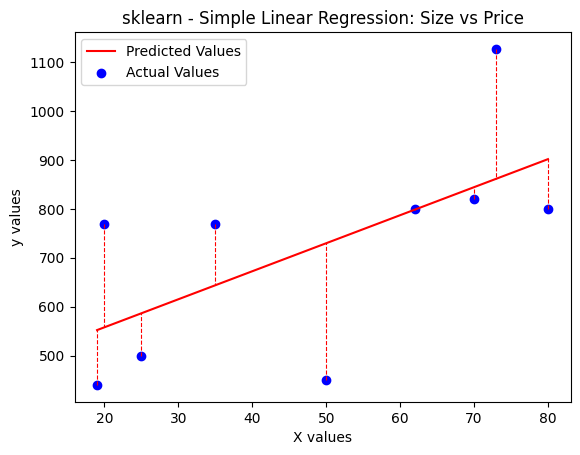

In [57]:
try:
    mean_squared_error(prices, sklearn_predictions)

    %matplotlib inline
    plt.close()
    AnalyticLinearModel.plot_1d(X=X[:, 1:], y=prices, predictions=sklearn_predictions, title="sklearn - Simple Linear Regression: Size vs Price")

except:
    print("Task not successful")

### Visualizing the Error Surface

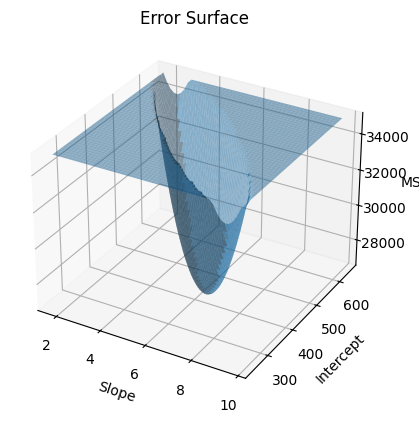

In [61]:
X = np.column_stack((np.ones(sizes.shape), sizes))
errors = []
model = AnalyticLinearModel()
model.fit(X, prices)

precision = 50
slope_grid = np.linspace(model.weights[1] - 4, model.weights[1] + 4, precision)
intercept_grid = np.linspace(model.weights[0] - 200, model.weights[0] + 200, precision)
slope_mesh, intercept_mesh = np.meshgrid(slope_grid, intercept_grid)
mesh = np.c_[slope_mesh.ravel(), intercept_mesh.ravel()]

for slope, intercept in mesh:
    model.weights = np.array([intercept, slope])
    predictions = model.predict(X)
    errors.append(mean_squared_error(prices, predictions, verbose=False))

#%matplotlib widget
plt.close()
error_mesh = np.clip(np.array(errors).reshape(slope_mesh.shape), 0, 35_000)  # clip for better visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(slope_mesh, intercept_mesh, error_mesh, alpha=0.5)
ax.set_xlabel("Slope")
ax.set_ylabel("Intercept")
ax.set_zlabel("MSE")
plt.title("Error Surface")
plt.show()

## Outlook: Polynomial Regression
### Motivation
For *simple regression* $x, 1\in\mathbb{R}^{m}$: Instead of solving $\underset{w}{\mathrm{arg\,min}}\; \lVert w_1x + w_0 1 - y\rVert^2_2$ i.e.
$$
\underset{w}{\mathrm{arg\,min}}\; \lVert \sum^1_{k=0}w_kx^k - y\rVert^2_2
$$
where $\cdot^k$ is applied element-wise, we extend the model class to polynomials of degree $d$ and solve
$$
\underset{w}{\mathrm{arg\,min}}\; \lVert \sum^d_{k=0}w_kx^k - y\rVert^2_2
$$

Note:
- this can be extended to the multivariate case
- by including the polynomial features directly in the input features $X$ (just like we did with the intercept) we stick to the same optimization target

$$
\underset{w}{\mathrm{arg\,min}}\; \lVert Xw - y\rVert^2_2
$$

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Function to plot with adjustable slope and intercept
def update_plot(ax, polynomial, quadratic=0, slope=1, intercept=0):
    title = "Interactive Linear Regression"
    legend = lambda _, b, c: f"Line: y = {b:.2f}x + {c:.2f}"
    if polynomial:  # used further below
        title = "Interactive Polynomial Regression"
        legend = lambda a, b, c: f"Line: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}"

    # Clear the axes but keep the figure
    ax.clear()
    
    # Scatter plot of the actual data
    ax.scatter(sizes, prices, color="C0", label='Actual Prices')
    
    # Line equation: y = slope * x + intercept
    predicted_prices = quadratic * sizes ** 2 + slope * sizes + intercept
    
    # Plot the fitted line with the current quadratic, slope and intercept
    sizes_grid = np.linspace(sizes.min(), sizes.max(), 50)
    predicted_prices_grid = quadratic * sizes_grid ** 2 + slope * sizes_grid + intercept
    ax.plot(sizes_grid, predicted_prices_grid, color="C1", label=legend(quadratic, slope, intercept), linestyle='--')

    # Draw error bars: vertical lines between actual and predicted values - more efficient approach
    error_lines = []
    for i in range(len(sizes)):
        error_lines.extend([[sizes[i], sizes[i]], [prices[i], predicted_prices[i]], [None, None]])
    
    # Plot all error lines at once (more efficient than individual plots)
    x_coords = [error_lines[i] for i in range(0, len(error_lines), 3)]
    y_coords = [error_lines[i] for i in range(1, len(error_lines), 3)]
    
    for x_line, y_line in zip(x_coords, y_coords):
        ax.plot(x_line, y_line, color="C2", linestyle='-', lw=1.5)

    # Calculate and display the mean squared error (MSE)
    mse = mean_squared_error(prices, predicted_prices, verbose=False)
    ax.text(0.5, 0.9, f'Mean Squared Error: {mse:,.1f}', 
            horizontalalignment='center', verticalalignment='center', 
            transform=ax.transAxes, fontsize=12, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Labels, title, and legend
    ax.set_title(title)
    ax.set_xlabel('Size of Apartment (square meters)')
    ax.set_ylabel('Price (EUR)')
    ax.legend()
    ax.grid(True)
    
    # Redraw the canvas
    fig.canvas.draw_idle()

%matplotlib widget
plt.close()

# Create persistent figure and axes for better performance
fig, ax = plt.subplots(figsize=(10, 6))

# Interactive widgets for slope and intercept
interact(update_plot, ax=fixed(ax), polynomial=fixed(True),
         quadratic=widgets.FloatSlider(min=-1, max=1, step=0.01, value=0),
         slope=widgets.FloatSlider(min=-80, max=80, step=0.1, value=1), 
         intercept=widgets.FloatSlider(min=-1000, max=3000, step=50, value=0));
